In [32]:
import pandas as pd
dataset = pd.read_csv("/content/MSFT.csv")

In [33]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
...,...,...,...,...,...,...,...
9419,2023-07-28,333.670013,340.010010,333.170013,338.369995,338.369995,28484900
9420,2023-07-31,336.920013,337.700012,333.359985,335.920013,335.920013,25446000
9421,2023-08-01,335.190002,338.540009,333.700012,336.339996,336.339996,18311900
9422,2023-08-02,333.630005,333.630005,326.359985,327.500000,327.500000,27761300


In [34]:
dataset = dataset[["Date","Close"]]
dataset

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9419,2023-07-28,338.369995
9420,2023-07-31,335.920013
9421,2023-08-01,336.339996
9422,2023-08-02,327.500000


In [35]:
import datetime

def str_to_datetime(s):
  split_list = s.split("-")
  year, month, day = int(split_list[0]), int(split_list[1]), int(split_list[2])
  return datetime.datetime(year=year, month=month, day=day)

obj = str_to_datetime("1999-01-01")
obj



datetime.datetime(1999, 1, 1, 0, 0)

In [36]:
dataset["Date"]= dataset["Date"].apply(str_to_datetime)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9424 non-null   datetime64[ns]
 1   Close   9424 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 147.4 KB


<ipython-input-36-355a468c8718>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Date"]= dataset["Date"].apply(str_to_datetime)


In [40]:
dataset

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9419,2023-07-28,338.369995
9420,2023-07-31,335.920013
9421,2023-08-01,336.339996
9422,2023-08-02,327.500000


In [48]:
dataset.index = dataset.pop("Date")

In [49]:
impo

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-07-28,338.369995
2023-07-31,335.920013
2023-08-01,336.339996


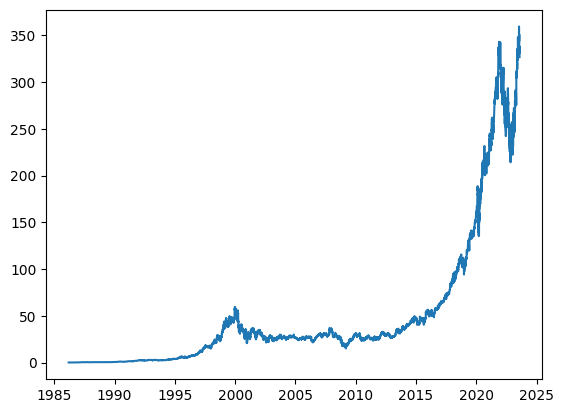

In [50]:
import matplotlib.pyplot as plt
plt.plot(dataset.index, dataset["Close"])

In [70]:
import numpy as np

def dataset_to_windowed_dataset(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    dataset_subset = dataframe.loc[:target_date].tail(n+1)

    if len(dataset_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = dataset_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_dataset = pd.DataFrame({})
  ret_dataset['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_dataset[f'Target-{n-i}'] = X[:, i]

  ret_dataset['Target'] = Y

  return ret_dataset

# Start day second time around: '2021-03-25'
windowed_dataset = dataset_to_windowed_dataset(dataset,
                                '2021-03-25',
                                '2023-08-03',
                                n=3)
windowed_dataset

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
589,2023-07-28,350.980011,337.769989,330.720001,338.369995
590,2023-07-31,337.769989,330.720001,338.369995,335.920013
591,2023-08-01,330.720001,338.369995,335.920013,336.339996
592,2023-08-02,338.369995,335.920013,336.339996,327.500000


In [71]:
def windowed_dataset_to_date_x_y(windowed_dataset):
  dataset_as_np = windowed_dataset.to_numpy()

  dates = dataset_as_np[:,0]
  middle_matricx = dataset_as_np[:,1:-1]
  x= middle_matricx.reshape(len(dates), middle_matricx.shape[1],1)

  y= dataset_as_np[:,-1]

  return dates, x.astype(np.float32), y.astype(np.float32)

dates,x,y = windowed_dataset_to_date_x_y(windowed_dataset)

dates.shape, x.shape, y.shape

((594,), (594, 3, 1), (594,))

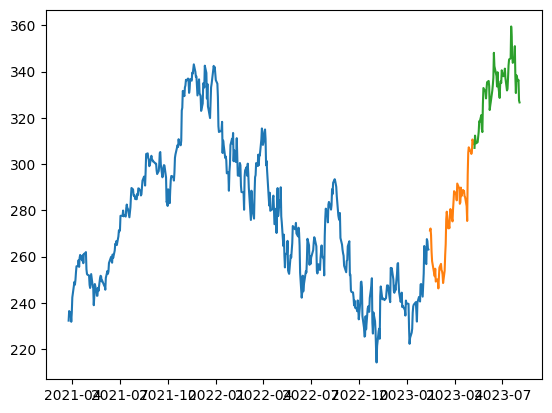

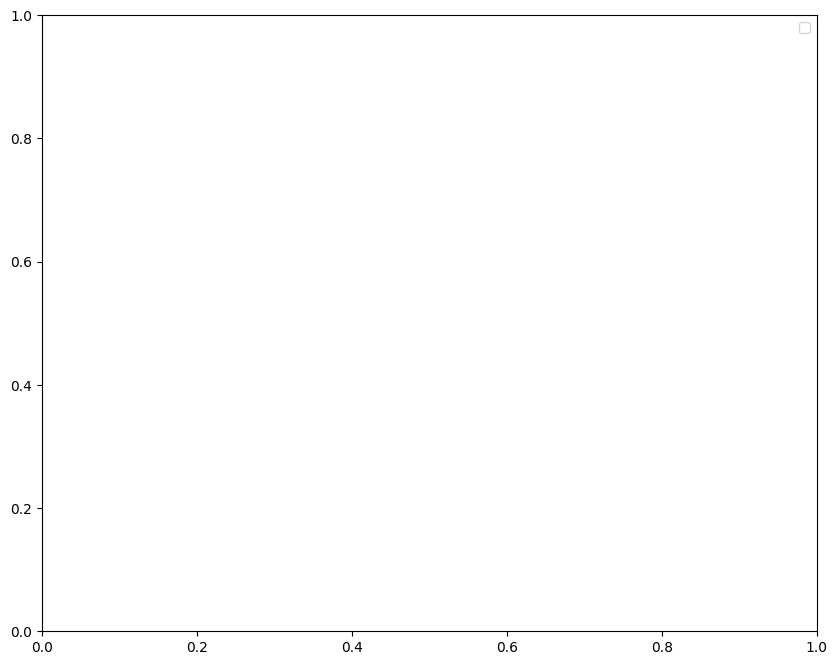

In [77]:
q_80 = int(len(dates) *0.8)
q_90 = int(len(dates) *0.9)

dates_train, x_train, y_train = dates[:q_80], x[:q_80], y[:q_80]
dates_val, x_val, y_val = dates[q_80:q_90], x[q_80:q_90], y[q_80:q_90]
dates_test, x_test, y_test = dates[q_90:], x[q_90:], y[q_90:]


plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.figure(figsize=(10,8))

plt.legend(["Train","val","Test"])

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
15/15 [==============================] - 4s 47ms/step - loss: 76734.1875 - mean_absolute_error: 275.3335 - val_loss: 76373.3594 - val_mean_absolute_error: 275.7524
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 76423.3672 - mean_absolute_error: 274.7693 - val_loss: 76014.9297 - val_mean_absolute_error: 275.1016
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 75915.0703 - mean_absolute_error: 273.8434 - val_loss: 75288.8672 - val_mean_absolute_error: 273.7784
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 74956.7812 - mean_absolute_error: 272.0830 - val_loss: 73990.2266 - val_mean_absolute_error: 271.3966
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 73335.2109 - mean_absolute_error: 269.0890 - val_loss: 71941.3906 - val_mean_absolute_error: 267.5957
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 70779.9219 - mean_absolute_error: 264.2798 - val_lo

15/15 [==============================] - 0s 3ms/step


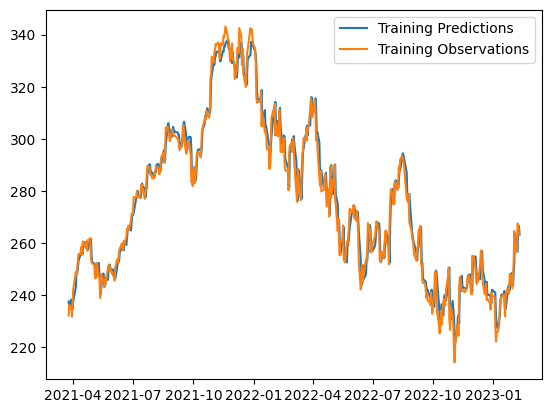

In [79]:
train_predictions = model.predict(x_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 7ms/step


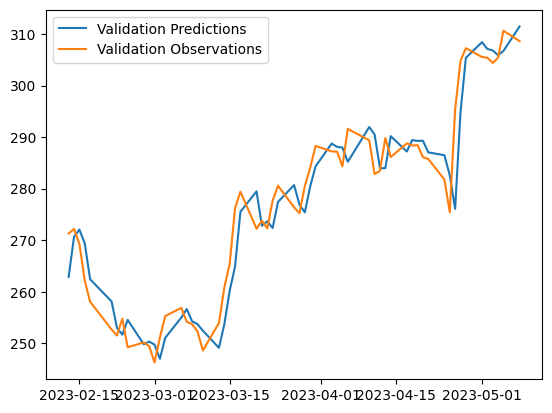

In [80]:
val_predictions = model.predict(x_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 7ms/step


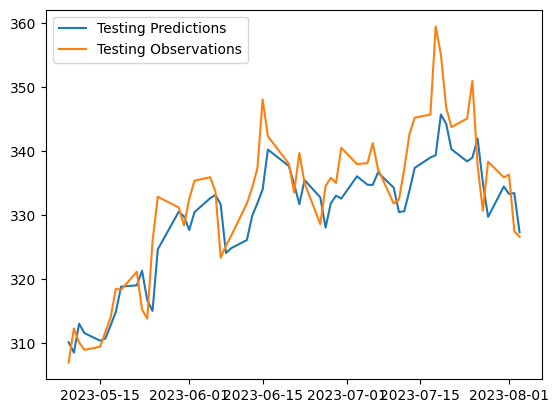

In [81]:
test_predictions = model.predict(x_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

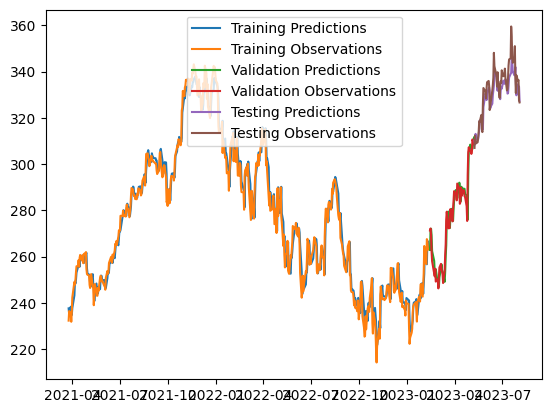

In [82]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(x_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

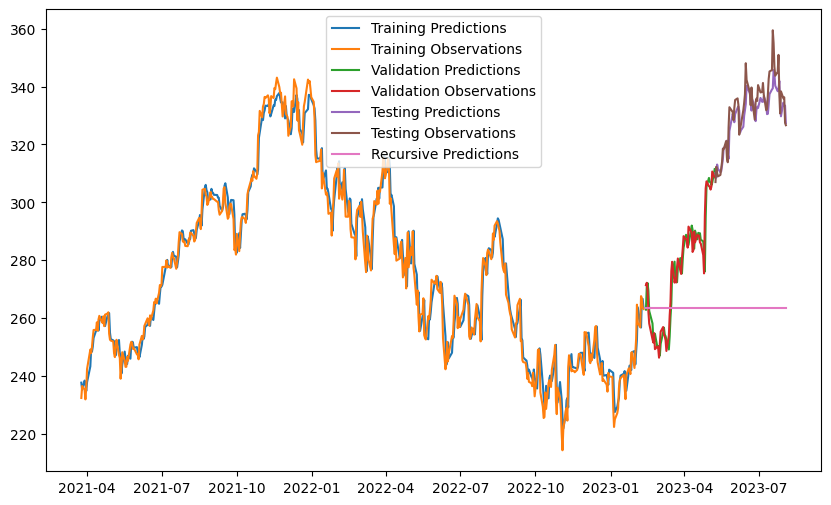

In [86]:
plt.figure(figsize=(10,6))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])